# Guessing Game Lab

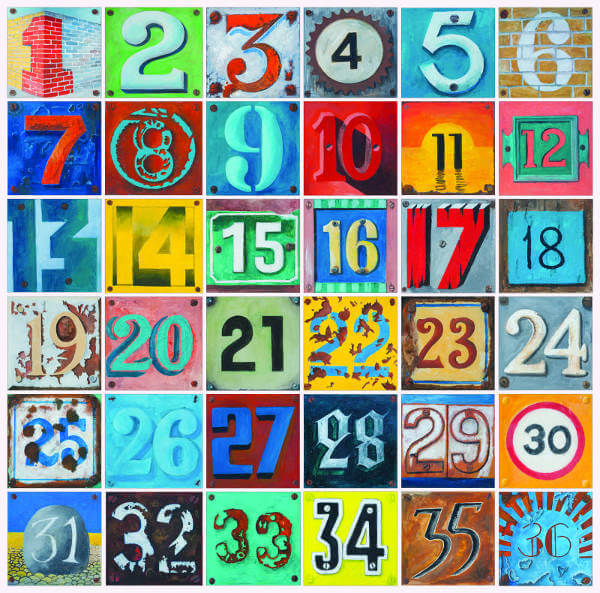

Let's use `while` loops to create a guessing game.

## The Challenge:

Write a program that picks a random integer from 1 to 100, and has players guess the number. The rules are:

1. If a player's guess is less than 1 or greater than 100 on any guess, print "OUT OF BOUNDS"
2. On a player's first turn, if their guess is
 * within 10 of the number, print "WARM!"
 * further than 10 away from the number, print "COLD!"
3. On all subsequent turns, if a guess is 
 * closer to the number than the previous guess, print "WARMER!"
 * farther from the number than the previous guess, print "COLDER!"
4. When the player's guess equals the number, tell them they've guessed correctly *and* how many guesses it took!


#### First, pick a random integer from 1 to 100 using the random module and assign it to a variable

Note: `random.randint(a,b)` returns a random integer in range `[a, b]`, including both end points.

In [5]:
import random
number = random.randint(1,100)

#### Create a list to store guesses

In [ ]:
import random
number = random.randint(1,100)
guesses = []
    

#### Write a `while` loop that asks for a valid guess. Test it a few times to make sure it works.

In [8]:
import random
number = random.randint(1,100)
guess = 0
guesses = []
win = False
print(number)
while win == False:
    guess = input('Try to guess the number between 0-100!')
    print(guess)
    break

100


Try to guess the number between 0-100! hgfdhgfd


hgfdhgfd


#### Write a `while` loop that compares the player's guess to our number. If the player guesses correctly, break from the loop. Otherwise, tell the player if they're warmer or colder, and continue asking for guesses. 

#### Keep doing this until they guess the number, then let them know and print out the number of guesses that it took. Example of a full game is below.

Some hints:
* it may help to sketch out all possible combinations on paper first!
* you can use the `abs()` function to find the positive difference between two numbers
* if you append all new guesses to the list, then the previous guess is given as `guesses[-2]`

In [1]:
import random
number = random.randint(1,100)
guess = 0
guesses = []
win = False
print(number)
while win == False:
    guess = input('Try to guess the number between 0-100!')
    try:
        guess = int(guess)
    except:
        print("Please enter a valid integer.")
    if guess < 1 or guess > 100:
        print('OUT OF BOUNDS')
    elif guess == number:
        win = True
    elif abs(guess-number) < 10:
        if len(guesses) == 0:
            print('WARM!')
        else:
            print('WARMER!')
    else:
        if len(guesses) == 0:
            print('COLD!')
        else:
            print('COLDER!')
    guesses += [guess]
print(f'Congratulations, you won! It took you {len(guesses)} tries!')

89


Try to guess the number between 0-100! 87


WARM!


Try to guess the number between 0-100! 89


Congratulations, you won! It took you 2 tries!


#### Optional Challenge: Too easy? Try implementing Wordle!

In [2]:
from random import randint


def printBoard(b):
  print(f'''
+--+--+--+--+--+
|{b[0][0]}|{b[0][1]}|{b[0][2]}|{b[0][3]}|{b[0][4]}|
|{b[1][0]}|{b[1][1]}|{b[1][2]}|{b[1][3]}|{b[1][4]}|
+--+--+--+--+--+
|{b[2][0]}|{b[2][1]}|{b[2][2]}|{b[2][3]}|{b[2][4]}|
|{b[3][0]}|{b[3][1]}|{b[3][2]}|{b[3][3]}|{b[3][4]}|
+--+--+--+--+--+
|{b[4][0]}|{b[4][1]}|{b[4][2]}|{b[4][3]}|{b[4][4]}|
|{b[5][0]}|{b[5][1]}|{b[5][2]}|{b[5][3]}|{b[5][4]}|
+--+--+--+--+--+
|{b[6][0]}|{b[6][1]}|{b[6][2]}|{b[6][3]}|{b[6][4]}|
|{b[7][0]}|{b[7][1]}|{b[7][2]}|{b[7][3]}|{b[7][4]}|
+--+--+--+--+--+
|{b[8][0]}|{b[8][1]}|{b[8][2]}|{b[8][3]}|{b[8][4]}|
|{b[9][0]}|{b[9][1]}|{b[9][2]}|{b[9][3]}|{b[9][4]}|
+--+--+--+--+--+
|{b[10][0]}|{b[10][1]}|{b[10][2]}|{b[10][3]}|{b[10][4]}|
|{b[11][0]}|{b[11][1]}|{b[11][2]}|{b[11][3]}|{b[11][4]}|
+--+--+--+--+--+
       ''')


def checkBoard(input, line):
  global word,board,cy,cg,cb,cw,gameRunning,letters
  tempw = word
  tempi = input
  for i in range(0, 5):
    board[(line-1)*2+1][i] = cb
    board[(line-1)*2][i] = input[i]+' '
    if input[i] == word[i]:
      board[(line-1)*2+1][i] = cg
      tempi = tempi[:i] + ' ' + tempi[i+1:]
      tempw = tempw[:i] + ' ' + tempw[i+1:]
  for a in range(len(tempi)):
    # loops thru all input letters left
    for b in range(len(tempw)):
      # loops thru all word letters left
      if tempi[b] == tempw[a] and (tempw[a] != ' '):
        board[(line-1)*2+1][b] = cy
        tempi = tempi[:b] + ' ' + tempi[b+1:]
        tempw = tempw[:a] + ' ' + tempw[a+1:]
  tempi=tempi.lower()
  templetters = letters
  for a in range(len(tempi)):
    # Loops through remaning input letters (grey) and deletes from available list
    if tempi[a] == ' ':
      pass
    else:
      for b in range(len(templetters)):
        if tempi[a] == templetters[b]:
          templetters = templetters[:b] + ' ' + templetters[b+1:]
  letters = ''
  for a in templetters:
    if a != ' ':
      letters += a
      
          
  printBoard(board)
  print(f'Available letters: {letters.upper()}')
  if tempi == '     ':
    gameover(True)
    gameRunning = False
  elif line == 6:
    gameover(False)
    gameRunning = False

  
def startGame():
  global word, cy, cg, cb, cw, board, gameRunning, row, letters
  gameRunning = True
  # yellow: \U0001F7E8 = cy = DIFFSPOT
  # green: \U0001F7E9 = cg = CORRECT
  # gray: \U0001F533 = cb = WRONG
  # black: \U00002B1B = cw = BLANK
  letters = 'abcdefghijklmnopqrstuvwxyz'
  cy = '\U0001F7E8'
  cg = '\U0001F7E9'
  cw = '\U0001F533'
  cb = '\U00002B1B'
  row = 1
  board = [['  ','  ','  ','  ','  '], [cw,cw,cw,cw,cw], ['  ','  ','  ','  ','  '], [cw,cw,cw,cw,cw], ['  ','  ','  ','  ','  '], [cw,cw,cw,cw,cw], ['  ','  ','  ','  ','  '], [cw,cw,cw,cw,cw], ['  ','  ','  ','  ','  '], [cw,cw,cw,cw,cw], ['  ','  ','  ','  ','  '], [cw,cw,cw,cw,cw]]
  with open('words.txt','r') as f:
    wordsstring = f.read()
  word = wordsstring.strip('][').split(', ')[randint(0, len(wordsstring.strip('][').split(', '))-1)]
  f.close()
  word = word[2:7].upper()


def game():
  global gameRunning, row
  tempinput = ''
  while gameRunning:
    try:
      tempinput = input('Please input a 5-letter guess: ')
      if len(tempinput) != 5 or any(i.isdigit() for i in tempinput):
        raise ValueError('invalid input')
      if not checkInput(tempinput):
        raise ValueError('invalid input')
      checkBoard(tempinput.upper(), row)
      row+=1
    except:
      print('Invalid input, try again.')


def gameover(win):
  global gameRunning, replay, row, word
  if win:
    print(f'Congrats, you got the word in {row} tries!')
  elif not win:
    print(f'Aw man, looks like you didn\'t get the word: {word}. It\'s okay!')
  else:
    print('how the fuck did u get here')
  while True:
      try: 
        replay = input('Would you like to play again? (y or n): ')
        if replay == 'n':
          break
        elif replay == 'y':
            startGame()
            game()
        else:
          raise ValueError('invalid input')
        break
      except:
        print("Invalid input.")


def checkInput(input):
  with open('words.txt','r') as f:
    wordsstring = f.read()
  word = wordsstring.strip('][').split(', ')
  f.close()
  for i in word:
    if input.lower() == i[2:7]:
      return True
  return False
  

def main():
  global word
  word = 'abcde'
  startGame()
  printBoard(board)
  game()

if __name__ == "__main__":
    main()


+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
       


Please input a 5-letter guess:  parks



+--+--+--+--+--+
|P |A |R |K |S |
|⬛|🟨|⬛|⬛|🟩|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
       
Available letters: ABCDEFGHIJLMNOQSTUVWXYZ


Please input a 5-letter guess:  great



+--+--+--+--+--+
|P |A |R |K |S |
|⬛|🟨|⬛|⬛|🟩|
+--+--+--+--+--+
|G |R |E |A |T |
|⬛|⬛|🟨|🟨|⬛|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
       
Available letters: ABCDEFHIJLMNOQSUVWXYZ


Please input a 5-letter guess:  beaks



+--+--+--+--+--+
|P |A |R |K |S |
|⬛|🟨|⬛|⬛|🟩|
+--+--+--+--+--+
|G |R |E |A |T |
|⬛|⬛|🟨|🟨|⬛|
+--+--+--+--+--+
|B |E |A |K |S |
|⬛|🟩|🟩|⬛|🟩|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
       
Available letters: ACDEFHIJLMNOQSUVWXYZ


Please input a 5-letter guess:  reals



+--+--+--+--+--+
|P |A |R |K |S |
|⬛|🟨|⬛|⬛|🟩|
+--+--+--+--+--+
|G |R |E |A |T |
|⬛|⬛|🟨|🟨|⬛|
+--+--+--+--+--+
|B |E |A |K |S |
|⬛|🟩|🟩|⬛|🟩|
+--+--+--+--+--+
|R |E |A |L |S |
|⬛|🟩|🟩|⬛|🟩|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
       
Available letters: ACDEFHIJMNOQSUVWXYZ


Please input a 5-letter guess:  deans



+--+--+--+--+--+
|P |A |R |K |S |
|⬛|🟨|⬛|⬛|🟩|
+--+--+--+--+--+
|G |R |E |A |T |
|⬛|⬛|🟨|🟨|⬛|
+--+--+--+--+--+
|B |E |A |K |S |
|⬛|🟩|🟩|⬛|🟩|
+--+--+--+--+--+
|R |E |A |L |S |
|⬛|🟩|🟩|⬛|🟩|
+--+--+--+--+--+
|D |E |A |N |S |
|⬛|🟩|🟩|⬛|🟩|
+--+--+--+--+--+
|  |  |  |  |  |
|🔳|🔳|🔳|🔳|🔳|
+--+--+--+--+--+
       
Available letters: ACEFHIJMOQSUVWXYZ


Please input a 5-letter guess:  seams



+--+--+--+--+--+
|P |A |R |K |S |
|⬛|🟨|⬛|⬛|🟩|
+--+--+--+--+--+
|G |R |E |A |T |
|⬛|⬛|🟨|🟨|⬛|
+--+--+--+--+--+
|B |E |A |K |S |
|⬛|🟩|🟩|⬛|🟩|
+--+--+--+--+--+
|R |E |A |L |S |
|⬛|🟩|🟩|⬛|🟩|
+--+--+--+--+--+
|D |E |A |N |S |
|⬛|🟩|🟩|⬛|🟩|
+--+--+--+--+--+
|S |E |A |M |S |
|🟩|🟩|🟩|🟩|🟩|
+--+--+--+--+--+
       
Available letters: ACEFHIJMOQSUVWXYZ
Congrats, you got the word in 6 tries!


Would you like to play again? (y or n):  n
